**Task 7: PCA & Stock Price Prediction**

Dataset Sample:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Dataset Dimensions: (150, 4)

Reduced Dataset:
        PC1       PC2  Target
0 -2.684126  0.319397       0
1 -2.714142 -0.177001       0
2 -2.888991 -0.144949       0
3 -2.745343 -0.318299       0
4 -2.728717  0.326755       0


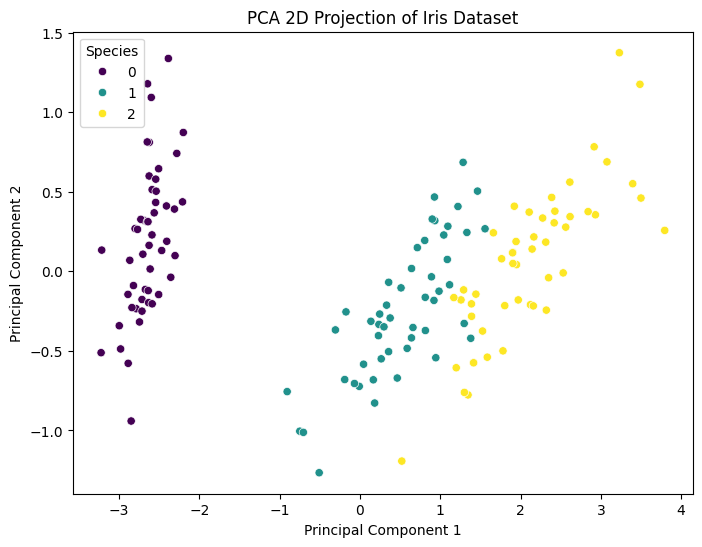

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Display sample
print("Dataset Sample:")
print(df.head())

# Check dataset dimensions
print("\nDataset Dimensions:", df.shape)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Convert to DataFrame for visualization
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])
df_pca['Target'] = iris.target

print("\nReduced Dataset:")
print(df_pca.head())

# Plot PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=df_pca, palette='viridis')
plt.title("PCA 2D Projection of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Species")
plt.show()

**Part 2: Stock Price Prediction (ARIMA)**

In [5]:
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Upload stock_prices.csv file
print("Please upload stock_prices.csv file:")
uploaded = files.upload()

Please upload stock_prices.csv file:


Saving Stock_prices.csv to Stock_prices (1).csv


Please upload your stock_prices.csv file:


Saving Stock_prices.csv to Stock_prices (3).csv

Stock Data Sample:


/tmp/ipython-input-1654627403.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(file_name, header=None, parse_dates=[0], index_col=0)


,Close
0,
2007-09-16 18:30:00+00:00,4494.649902
2007-09-17 18:30:00+00:00,4546.200195
2007-09-18 18:30:00+00:00,4732.350098
2007-09-19 18:30:00+00:00,4747.549805
2007-09-20 18:30:00+00:00,4837.549805



Missing Values: {'Close': 1850}


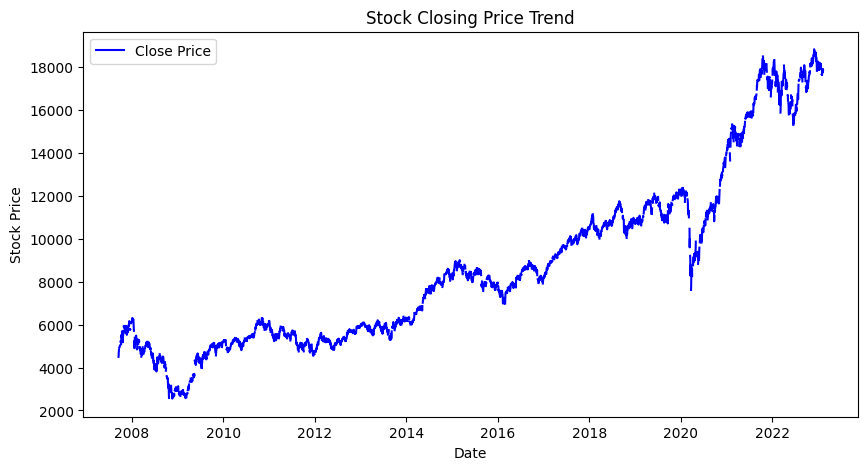

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2852
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -17729.263
Date:                Sun, 10 Aug 2025   AIC                          35468.525
Time:                        04:31:51   BIC                          35498.303
Sample:                             0   HQIC                         35479.264
                               - 2852                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1318     16.309     -0.008      0.994     -32.096      31.833
ar.L2          0.0195      9.245      0.002      0.998     -18.100      18.139
ma.L1          0.1336     16.309      0.008      0.9

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


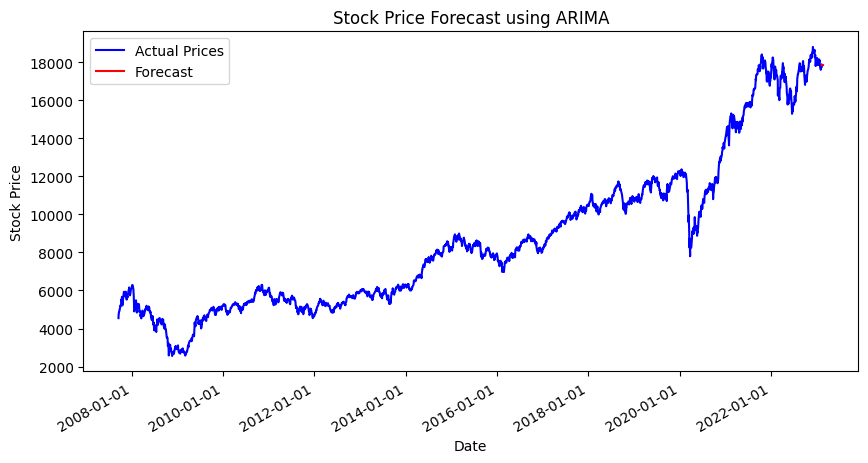

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from google.colab import files
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Upload CSV file
print("Please upload your stock_prices.csv file:")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]

# Step 2: Load CSV
df = pd.read_csv(file_name, header=None, parse_dates=[0], index_col=0)

# Step 3: Rename columns (Assume column 4 is Close)
df.rename(columns={4: 'Close'}, inplace=True)

# Step 4: Keep only Close column & ensure numeric
df = df[['Close']]
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')

# Step 5: Drop NaN values
df.dropna(subset=['Close'], inplace=True)

# Step 6: Set index as daily frequency
df.index = pd.to_datetime(df.index)
df = df.asfreq('D')  # Ensures daily frequency

# Step 7: Display dataset info
print("\nStock Data Sample:")
display(df.head())
print("\nMissing Values:", df.isnull().sum().to_dict())

# Step 8: Plot Closing Price Trend
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Close'], label="Close Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.show()

# Step 9: Create Lag Feature
df['Prev_Close'] = df['Close'].shift(1)
df.dropna(inplace=True)

# Step 10: Train ARIMA Model
if len(df) > 1:
    model = ARIMA(df['Close'], order=(2, 1, 2))
    model_fit = model.fit()
    print(model_fit.summary())

    # Step 11: Forecast
    forecast = model_fit.forecast(steps=10)
    print("\nForecasted Prices:\n", forecast)

    # Step 12: Model Evaluation
    y_true = df['Close']
    y_pred = model_fit.fittedvalues
    mae = mean_absolute_error(y_true[1:], y_pred[1:])
    rmse = np.sqrt(mean_squared_error(y_true[1:], y_pred[1:]))
    mape = np.mean(np.abs((y_true[1:] - y_pred[1:]) / y_true[1:])) * 100

    print("\nModel Evaluation Metrics:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    # Step 13: Plot Actual vs Forecast
    plt.figure(figsize=(10, 5))
    plt.plot(df.index, df['Close'], label="Actual Prices", color='blue')

    future_dates = pd.date_range(start=df.index[-1], periods=11, freq='D')[1:]
    plt.plot(future_dates, forecast, label="Forecast", color='red')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
    plt.gcf().autofmt_xdate()

    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.title("Stock Price Forecast using ARIMA")
    plt.legend()
    plt.show()
else:
    print("Not enough data to fit the ARIMA model.")